<a href="https://colab.research.google.com/github/rick1270/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Clayton_Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import pandas as pd
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [32]:
housing_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(housing_url)
df.drop(columns=['Id'], inplace = True)
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1088,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137500
991,70,RM,121.0,17671,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,2Story,8,9,1882,1986,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,No,BLQ,216,Unf,0,700,916,GasA,Gd,Y,SBrkr,916,826,0,1742,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Attchd,1925.0,Unf,2,424,TA,TA,P,0,169,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,168000
1035,20,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,3,1957,1957,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,N,SBrkr,845,0,0,845,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,1,290,TA,TA,N,186,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,84000
1246,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,756,756,GasA,Ex,Y,SBrkr,756,797,0,1553,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2005.0,RFn,2,615,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,3,2006,New,Partial,186500
528,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348,Unf,0,180,528,GasA,Ex,Y,SBrkr,605,0,0,605,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,86000
32,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1234,1234,GasA,Ex,Y,SBrkr,1234,0,0,1234,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,484,TA,TA,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,179900
746,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300,Unf,0,652,952,GasA,Ex,Y,SBrkr,980,1276,0,2256,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2,554,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1033,20,RL,NaN,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,Stone,295.0,Gd,TA,PConc,Gd,TA,No,GLQ,986,Unf,0,668,1654,GasA,Ex,Y,SBrkr,1654,0,0,1654,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,Unf,3,900,TA,TA,Y,0,136,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,230000
1370,50,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,4,6,1920,1950,Gable,CompShg,CBlock,CBlock,None,0.0,Fa,TA,PConc,TA,TA,No,ALQ,315,Rec,105,420,840,GasA,Ex,Y,SBrkr,840,534,0,1374,0,0,1,0,2,1,TA,6,Typ,

In [33]:
df.fillna(0, inplace=True)
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [34]:
cols = df.columns.values.tolist()
for i in range(0,len(cols)):
    print(cols[i], df[cols[i]].unique())


MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.   0.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
Street ['Pave' 'Grvl']
Alley [0 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Vee

In [0]:
df[str('MSZoning')].replace({'RL':1, 'RM':2, 'C (all)':3, 'FV':4, 'RH':5}, inplace=True)
df['Street'].replace({'Pave':1, 'Grvl':0}, inplace=True)
df['Alley'].replace({'Grvl':1, 'Pave':2}, inplace=True)
df['LotShape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
df['LandContour'].replace({'Lvl':1, 'Bnk':2, 'Low':3, 'HLS':4}, inplace=True)
df['Utilities'].replace({'AllPub':1, 'NoSeWa':0}, inplace=True)
df['LotConfig'].replace({'Inside':1, 'FR2':2, 'Corner':3, 'CulDSac':4, 'FR3':5}, inplace=True)
df['LandSlope'].replace({'Gtl':3, 'Mod':2, 'Sev':1}, inplace=True)
df['Neighborhood'].replace({'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6, 'NWAmes':7,
 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11, 'NAmes':12, 'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18, 'StoneBr':19, 'ClearCr':20, 'NPkVill':21,
 'Blmngtn':22, 'BrDale':23, 'SWISU':24, 'Blueste':25}, inplace=True)
df['Condition1'].replace({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9}, inplace=True)
df['Condition2'].replace({'Norm':1, 'Artery':2, 'RRNn':3, 'Feedr':4, 'PosN':5, 'PosA':6, 'RRAn':7, 'RRAe':8}, inplace=True)
#df['LandSlope'].replace({'Gtl':1, 'Mod':2, 'Sev':3}, inplace=True)
df['BldgType'].replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5}, inplace=True)
df['HouseStyle'].replace({'2Story':1, '1Story':2, '1.5Fin':3, '1.5Unf':4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7, '2.5Fin':8}, inplace=True)
df['RoofStyle'].replace({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6}, inplace=True)
df['RoofMatl'].replace({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6, 'Roll':7, 'ClyTile':8}, inplace=True)
df['Exterior1st'].replace({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6, 'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12, 'Stone':13, 'ImStucc':14, 
 'CBlock':15}, inplace=True)
df['Exterior2nd'].replace({'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6, 'CmentBd':7, 'BrkFace':8, 'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12, 'AsphShn':13, 'Stone':14, 'Other':15, 'CBlock':16}, inplace=True)
df['MasVnrType'].replace({'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn':4}, inplace=True)
df['ExterQual'].replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4}, inplace=True)
df['ExterCond'].replace({'TA':1, 'Gd':2, 'Fa':3, 'Po':4, 'Ex':5}, inplace=True)
df['Foundation'].replace({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':6}, inplace=True)
df['BsmtQual'].replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4}, inplace=True)
df['BsmtCond'].replace({'TA':1, 'Gd':2, 'Fa':3, 'Po':4}, inplace=True)
df['BsmtExposure'].replace({'No':1, 'Gd':2, 'Mn':3, 'Av':4}, inplace=True)
df['BsmtFinType1'].replace({'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'LwQ':6}, inplace=True)
df['BsmtFinType2'].replace({'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'LwQ':6}, inplace=True)
df['Heating'].replace({'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6}, inplace=True)
df['HeatingQC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}, inplace=True)
df['CentralAir'].replace({'Y':1, 'N':0}, inplace=True)
df['KitchenQual'].replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4}, inplace=True)
df['Functional'].replace({'Typ':1, 'Min1':2, 'Maj1':3, 'Min2':4, 'Mod':5, 'Maj2':6, 'Sev':7}, inplace=True)
df['FireplaceQu'].replace({'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5}, inplace=True)
df['GarageType'].replace({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'CarPort':4, 'Basment':5, '2Types':6}, inplace=True)
df['GarageFinish'].replace({'RFn':1, 'Unf':2, 'Fin':3,}, inplace=True)
df['GarageQual'].replace({'TA':1, 'Fa':2, 'Gd':3, 'Ex':4, 'Po':5}, inplace=True)
df['GarageCond'].replace({'TA':1, 'Fa':2, 'Gd':3, 'Po':4, 'Ex':5}, inplace=True)
df['PavedDrive'].replace({'Y':3, 'N':1, 'P':2}, inplace=True)
df['PoolQC'].replace({'Ex':1, 'Fa':2, 'Gd':3}, inplace=True)
df['Fence'].replace({'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4}, inplace=True)
df['MiscFeature'].replace({'Shed':1, 'Gar2':2, 'Othr':3, 'TenC':4}, inplace=True)
df['Electrical'].replace({'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5}, inplace=True)
df['SaleType'].replace({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9}, inplace=True)
df['SaleCondition'].replace({'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand':4, 'Alloca':5, 'Family':6}, inplace=True)



In [36]:

df.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int64
HeatingQC          int64


In [0]:
#A log-transformed y variable
df['log_SalePrice'] = np.log(df['SalePrice'])

In [38]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,60,1,65.0,8450,1,0,1,1,1,1,3,1,1,1,1,1,7,5,2003,2003,1,1,1,1,1,196.0,1,1,1,1,1,1,1,706,3,0,150,856,1,1,1,1,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,0,1,2003.0,1,2,548,1,1,3,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,208500,12.247694
1,20,1,80.0,9600,1,0,1,1,1,2,3,2,2,1,1,2,6,8,1976,1976,1,1,2,2,2,0.0,2,1,2,1,1,2,2,978,3,0,284,1262,1,1,1,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,1,1,1976.0,1,2,460,1,1,3,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,181500,12.109011
2,60,1,68.0,11250,1,0,2,1,1,1,3,1,1,1,1,1,7,5,2001,2002,1,1,1,1,1,162.0,1,1,1,1,1,3,1,486,3,0,434,920,1,1,1,1,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,1,1,2001.0,1,2,608,1,1,3,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,223500,12.317167
3,70,1,60.0,9550,1,0,2,1,1,3,3,3,1,1,1,1,7,5,1915,1970,1,1,3,3,2,0.0,2,1,3,2,2,1,2,216,3,0,540,756,1,2,1,1,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,2,2,1998.0,2,3,642,1,1,3,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,140000,11.849398
4,60,1,84.0,14260,1,0,2,1,1,2,3,4,1,1,1,1,8,5,2000,2000,1,1,1,1,1,350.0,1,1,1,1,1,4,1,655,3,0,490,1145,1,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,1,1,2000.0,1,3,836,1,1,3,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,250000,12.429216


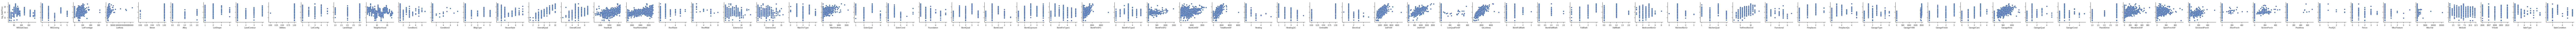

In [39]:
sns.set(style="ticks", color_codes=True)
x_columns = df.columns.drop(['SalePrice', 'log_SalePrice'] )
sns.pairplot(data=df, y_vars=['log_SalePrice'], x_vars=x_columns)

In [40]:
#2 polynomial features
df['SQ_OverallQual'], df['SQ_TotRmsAbvGrd'] = df['OverallQual']**2, df['TotRmsAbvGrd']**2
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice,SQ_OverallQual,SQ_TotRmsAbvGrd
0,60,1,65.0,8450,1,0,1,1,1,1,3,1,1,1,1,1,7,5,2003,2003,1,1,1,1,1,196.0,1,1,1,1,1,1,1,706,3,0,150,856,1,1,1,1,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,0,1,2003.0,1,2,548,1,1,3,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,208500,12.247694,49,64
1,20,1,80.0,9600,1,0,1,1,1,2,3,2,2,1,1,2,6,8,1976,1976,1,1,2,2,2,0.0,2,1,2,1,1,2,2,978,3,0,284,1262,1,1,1,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,1,1,1976.0,1,2,460,1,1,3,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,181500,12.109011,36,36
2,60,1,68.0,11250,1,0,2,1,1,1,3,1,1,1,1,1,7,5,2001,2002,1,1,1,1,1,162.0,1,1,1,1,1,3,1,486,3,0,434,920,1,1,1,1,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,1,1,2001.0,1,2,608,1,1,3,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,223500,12.317167,49,36
3,70,1,60.0,9550,1,0,2,1,1,3,3,3,1,1,1,1,7,5,1915,1970,1,1,3,3,2,0.0,2,1,3,2,2,1,2,216,3,0,540,756,1,2,1,1,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,2,2,1998.0,2,3,642,1,1,3,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,140000,11.849398,49,49
4,60,1,84.0,14260,1,0,2,1,1,2,3,4,1,1,1,1,8,5,2000,2000,1,1,1,1,1,350.0,1,1,1,1,1,4,1,655,3,0,490,1145,1,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,1,1,2000.0,1,3,836,1,1,3,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,250000,12.429216,64,81


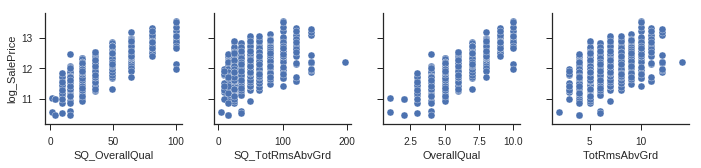

In [41]:
sns.set(style="ticks", color_codes=True)
poly_columns = 'SQ_OverallQual', 'SQ_TotRmsAbvGrd', 'OverallQual', 'TotRmsAbvGrd'
sns.pairplot(data=df, y_vars=['log_SalePrice'], x_vars=poly_columns)

In [0]:
df['Open_Area'] = df['LotArea']-df['1stFlrSF']
df['Baths'] = df['FullBath'] + df['HalfBath']
df['Garage'] = df['GarageArea'] * df['GarageQual']

In [46]:
y = df.loc[:, ['log_SalePrice']].values
X = df.loc[:, ['SQ_OverallQual', 'SQ_TotRmsAbvGrd', 'Open_Area', 'MSZoning', 'Street', 'LandContour', 'Neighborhood', 'BldgType', 'OverallCond', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'Baths', 'Garage', 'PoolArea']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.17646807246888982
R^2 is 0.8132542926966349
coefficients:  [ 1.11893903e-02 -8.36054570e-04  2.11395728e-06 -3.21938779e-02
  1.20086334e-02  2.71832523e-02 -3.16663422e-03 -2.11978490e-02
  2.89005527e-02  6.51380878e-05  2.41646190e-04  7.01753182e-05
  1.36940702e-01  1.26855587e-04 -7.49659120e-04]
intercepts:  [10.84763855]


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data